# Analysis PCA

# Author: Ricardo Vallejo R.

# 1. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

dataOriginal = pd.read_excel("autos-Saporta.xls", "original")
pd.set_option('display.max_rows', None)
n_data = dataOriginal.shape[0]
dataOriginal


,Modele,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,Alfasud TI,1350,79,393,161,870,165
1,Audi 100,1588,85,468,177,1110,160
2,Simca 1300,1294,68,424,168,1050,152
3,Citroen GS Club,1222,59,412,161,930,151
4,Fiat 132,1585,98,439,164,1105,165
5,Lancia Beta,1297,82,429,169,1080,160
6,Peugeot 504,1796,79,449,169,1160,154
7,Renault 16 TL,1565,55,424,163,1010,140
8,Renault 30,2664,128,452,173,1320,180
9,Toyota Corolla,1166,55,399,157,815,140


# 2. Standarisation

<font color="blue">Nous devons explicitement centrer et réduire les variables pour réaliser une ACP normée avec PCA.</font>

In [2]:
from sklearn.preprocessing import StandardScaler


dataOriginal_X = dataOriginal.drop(['Modele'], axis = 1)

scaler = StandardScaler()
scaler.fit(dataOriginal_X)
data_std = scaler.transform(dataOriginal_X)
data_standarized = pd.DataFrame(data_std, columns = ['CYL','PUISS','LONG','LARG','POIDS','V.MAX'])
data_standarized

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,-0.775099,-0.283358,-1.885081,-1.097345,-1.569007,0.569760
1,-0.120163,0.019639,1.605810,2.001041,0.234161,0.145972
2,-0.929201,-0.838852,-0.442179,0.258199,-0.216631,-0.532090
3,-1.127333,-1.293348,-1.000722,-1.097345,-1.118215,-0.616848
4,-0.128419,0.676132,0.255999,-0.516398,0.196595,0.569760
5,-0.920946,-0.131860,-0.209453,0.451848,0.008765,0.145972
6,0.452217,-0.283358,0.721451,0.451848,0.609821,-0.362575
7,-0.183455,-1.495346,-0.442179,-0.710047,-0.517159,-1.549183
8,2.840806,2.191116,0.861086,1.226445,1.811934,1.841127
9,-1.281436,-1.495346,-1.605810,-1.871942,-1.982233,-1.549183


In [3]:
data_standarized['Modele']=dataOriginal['Modele']

Verfication:  <font color="blue">Apres l'standarisation Les moyennes sont maintenant nulles et les écarts-type unitaires</font>

In [4]:
data_standarized.describe()

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,-2.158767e-16,-1.480297e-16,1.233581e-17,1.850372e-15,5.859510e-16,5.427757e-16
std,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.281436e+00,-1.495346e+00,-1.885081e+00,-1.871942e+00,-1.982233e+00,-1.549183e+00
25%,-8.844841e-01,-6.999789e-01,-4.421794e-01,-8.552838e-01,-4.420266e-01,-5.956586e-01
50%,-1.490575e-01,-1.318597e-01,4.654520e-02,6.454972e-02,6.511441e-02,1.459717e-01
75%,4.563452e-01,6.761319e-01,6.749055e-01,5.970849e-01,3.600075e-01,5.697604e-01
max,2.840806e+00,2.191116e+00,1.652355e+00,2.001041e+00,2.187594e+00,1.841127e+00


# 3.  Exploration de desviation et moyenne

In [5]:
# Moyenes et ecart-types

In [6]:
x_labels = ['CYL','PUISS','LONG','LARG','POIDS','V.MAX']

# 4. Correlation 

In [7]:
correlation_matrix = np.corrcoef(data_standarized[x_labels].transpose())

pd.DataFrame(correlation_matrix.round(2), columns = x_labels, index = x_labels)


,CYL,PUISS,LONG,LARG,POIDS,V.MAX
CYL,1.00,0.80,0.70,0.63,0.79,0.66
PUISS,0.80,1.00,0.64,0.52,0.77,0.84
LONG,0.70,0.64,1.00,0.85,0.87,0.48
LARG,0.63,0.52,0.85,1.00,0.72,0.47
POIDS,0.79,0.77,0.87,0.72,1.00,0.48
V.MAX,0.66,0.84,0.48,0.47,0.48,1.00


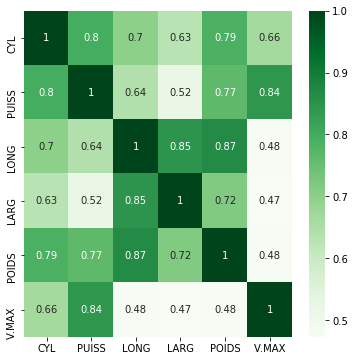

In [8]:
import seaborn as sns

dfCorrelation = correlation_matrix.astype('float')  # !! Neccessary for Heatmap
dfCorrelation = pd.DataFrame(correlation_matrix, columns = x_labels, index = x_labels)
plt.figure(figsize=(6,6))
sns.heatmap(dfCorrelation, annot=True, cmap="Greens")
plt.show()

# 5. Finding eigen values and vectors from correlation matrix

In [9]:
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

In [10]:
#Valeurs propes

eig_vals.round(3)

array([4.421, 0.856, 0.373, 0.214, 0.093, 0.043])

In [11]:
#Vecteur propes

eig_vecs.round(3)

array([[-0.425, -0.124, -0.354,  0.808,  0.152, -0.059],
       [-0.422, -0.416, -0.185, -0.358, -0.294, -0.633],
       [-0.421,  0.412,  0.068, -0.28 ,  0.731, -0.19 ],
       [-0.387,  0.446,  0.605,  0.212, -0.478, -0.11 ],
       [-0.431,  0.243, -0.484, -0.302, -0.305,  0.581],
       [-0.359, -0.62 ,  0.485, -0.074,  0.189,  0.459]])

In [12]:
eig_vecs.shape # numero de donnes vs numero de descriptors

(6, 6)

# 6. Optimal number of components

# 6.1.  Methode de code

In [13]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

SSE = []
for cluster in range(1,7):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_standarized[x_labels])
    SSE.append(kmeans.inertia_)



Text(0, 0.5, 'Inertia')

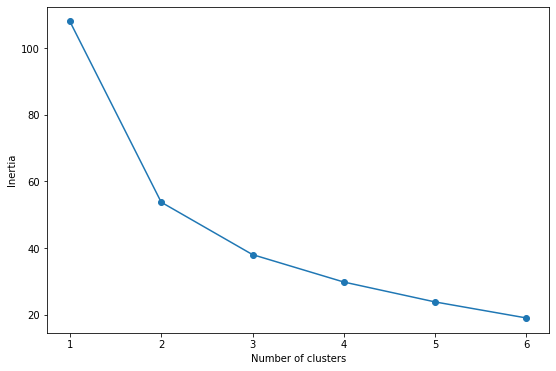

In [14]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,7), 'SSE':SSE})
plt.figure(figsize=(9,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [15]:
SSE

[107.99999999999999,
 53.73357823998603,
 37.99910481809746,
 29.76155158105334,
 23.78434480630585,
 18.97277566748012]

<font color="blue">Pour observation le numero optimal cest entre 2 et 3 composants</font>


In [16]:
SSE_Info = pd.DataFrame(SSE, columns = ['SSE']).sort_values(by=['SSE'])
SSE_Info

,SSE
5,18.972776
4,23.784345
3,29.761552
2,37.999105
1,53.733578
0,108.000000


# 6.2.  Matrix de composant principaux et explained_variance_ratio


In [17]:
from sklearn.decomposition import PCA

pca = PCA() #PCA(n_components=2)  Default numero de composant equal a numero de variables
principalComponents = pca.fit_transform(data_standarized[x_labels])
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5
0,-2.138924,1.785681,0.571862,0.201927,-0.301357,0.053921
1,1.561459,-1.527040,1.315271,-0.211352,0.148516,-0.327238
2,-1.119385,-0.674505,0.456588,-0.167626,-0.375364,0.271803
3,-2.573742,0.112884,0.148570,-0.017343,0.226853,0.263476
4,0.427855,0.695567,-0.193286,-0.627754,0.263505,-0.037153
5,-0.304238,-0.196149,0.675803,-0.555941,-0.445086,0.200083
6,0.683928,-0.933057,-0.256823,0.203134,0.208652,0.153892
7,-1.948493,-0.980448,-0.619575,0.630319,0.293165,0.108642
8,4.409735,1.063633,-0.593528,0.847248,-0.374890,0.043997
9,-3.985782,0.236240,-0.303133,0.265122,0.278428,-0.328892


In [18]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA fournit également les proportions de variance associées aux axes.

In [19]:
print(pca.explained_variance_ratio_.round(4))

[0.7368 0.1427 0.0622 0.0357 0.0155 0.0072]


<font color="blue">On dois le voir de facon acumulative pour reconnaitre la variance obtenu:</font>

In [20]:
 range(len(eig_vals))

range(0, 6)

In [21]:
factors = range(len(eig_vals))

SSE_Info['Variance Explained ratio'] = pca.explained_variance_ratio_.cumsum()
SSE_Info


,SSE,Variance Explained ratio
5,18.972776,0.736810
4,23.784345,0.879487
3,29.761552,0.941664
2,37.999105,0.977318
1,53.733578,0.992785
0,108.000000,1.000000


<font color="blue">La première composante accapare 73.68% de l’information disponible. 87.94% avec les deux premiers facteurs. </font>

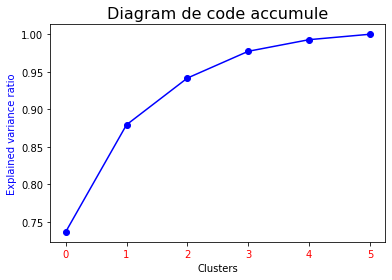

In [22]:
plt.plot(factors, SSE_Info['Variance Explained ratio'], color='Blue', marker='o')
plt.title('Diagram de code accumule', color = 'black', fontsize = 16)
plt.xlabel('Clusters',color = 'black')
plt.ylabel('Explained variance ratio', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'black')
#plt.savefig('linechart_single.png')
plt.show()

# 7.  Modelisation avec selection de k=2

In [23]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(data_standarized[x_labels])
principalComponentsDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])
principalComponentsDf

#The same first two columns of principalComponents avec n_components default.   default = same number of descriptors original

,PC1,PC2
0,-2.138924,1.785681
1,1.561459,-1.527040
2,-1.119385,-0.674505
3,-2.573742,0.112884
4,0.427855,0.695567
5,-0.304238,-0.196149
6,0.683928,-0.933057
7,-1.948493,-0.980448
8,4.409735,1.063633
9,-3.985782,0.236240


<function matplotlib.pyplot.show(*args, **kw)>

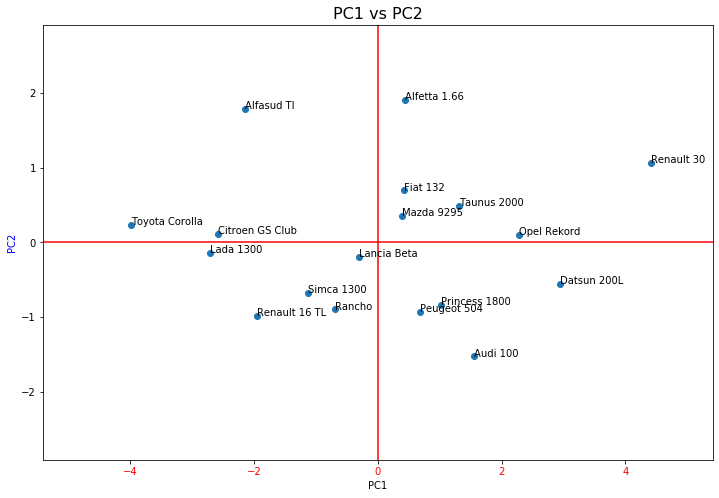

In [24]:
fig, axes = plt.subplots(figsize=(12,8))
#Axes
xmin = principalComponentsDf['PC1'].max()
ymin = principalComponentsDf['PC2'].max()

axes.set_xlim(-xmin-1, xmin+1)
axes.set_ylim(-ymin-1, ymin+1)

axes.axhline(0,color='red') # x = 0
axes.axvline(0,color='red') # y = 0

#Labels
plt.title('PC1 vs PC2', color = 'black', fontsize = 16)
plt.xlabel('PC1',color = 'black')
plt.ylabel('PC2', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'black')

#Data graphique
plt.scatter(principalComponentsDf['PC1'], principalComponentsDf['PC2'])
principalComponentsDf['Modele'] = dataOriginal['Modele']  #For labels points

#Including tags for any plot in order to identify in the new artifitiel dimension PC1, PC2
for i, row in principalComponentsDf.iterrows():
    plt.annotate(principalComponentsDf['Modele'].iloc[i], (principalComponentsDf['PC1'].iloc[i], principalComponentsDf['PC2'].iloc[i]))
plt.show


In [25]:
i=2
dataOriginal['Modele'].iloc[i]

'Simca 1300'

# 7.  Interpretation

In [26]:
eig_vals.sum() #Equal a numero de Lambdas

5.999999999999998

# 7.1  Obtention des Axes factorials

In [27]:
print(pca.components_.round(4))  #se rappeller que avec python sont les lignes

[[ 0.4249  0.4218  0.4215  0.3869  0.4305  0.3589]
 [ 0.1242  0.4158 -0.4118 -0.4461 -0.2427  0.6199]
 [-0.3536 -0.1849  0.0676  0.6049 -0.4844  0.4855]
 [ 0.8078 -0.3578 -0.2798  0.2116 -0.3017 -0.0736]
 [ 0.1516 -0.2937  0.7306 -0.4782 -0.3046  0.1887]
 [-0.0589 -0.633  -0.1903 -0.1096  0.5808  0.4585]]


In [28]:
# L'ordre de lignes de components cest relie a la qualite de la variable

<font color="red">Observer que la matriz de composants cest la meme eigenVecteurs obtenus de la correlation mais transpose - Python case</font>

In [29]:
eig_vecs.T.round(4)

array([[-0.4249, -0.4218, -0.4215, -0.3869, -0.4305, -0.3589],
       [-0.1242, -0.4158,  0.4118,  0.4461,  0.2427, -0.6199],
       [-0.3536, -0.1849,  0.0676,  0.6049, -0.4844,  0.4855],
       [ 0.8078, -0.3578, -0.2798,  0.2116, -0.3017, -0.0736],
       [ 0.1516, -0.2937,  0.7306, -0.4782, -0.3046,  0.1887],
       [-0.0589, -0.633 , -0.1903, -0.1096,  0.5808,  0.4585]])

# Les deux premieres axe factoriels

In [30]:
# u1 = [ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]

In [31]:
# u2 = [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]

In [32]:
print(pca2.components_.round(3))

[[ 0.425  0.422  0.421  0.387  0.431  0.359]
 [ 0.124  0.416 -0.412 -0.446 -0.243  0.62 ]]


# 8. Qualite Globale de la representation

In [33]:
# Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances
# à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale


In [34]:
di = np.sum(data_standarized[x_labels]**2,axis=1) 
print(pd.DataFrame({'ID':data_standarized['Modele'],'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta 1.66   4.456770
11    Princess 1800   1.952513
12      Datsun 200L  11.112624
13      Taunus 2000   2.452986
14           Rancho   1.963373
15       Mazda 9295   0.684521
16      Opel Rekord   6.083119
17        Lada 1300   7.922198


<font color="blue">Concrètement, la Renault 30 et la Toyota Corolla sont les deux véhicules qui se démarquent le plus des autres, 
et on les retrouve aux deux extrémités du premier axe factoriel qui porte 73.68% de l’information disponible.</font>

In [35]:
eig_vals[0:2]

array([4.42085806, 0.85606229])

In [36]:
# Avec k=2, les deux composant representatives

Ik =((4.42 + 0.85) / np.sum(eig_vals) ) *100
Ik

87.83333333333336

<font color="blue">La qualite globale est preserve a 88%</font>

In [37]:
eig_vals[0:2]

array([4.42085806, 0.85606229])

In [38]:
eig_vals[0:2].sum()

5.276920348854847

# 8.1. Qualité de représentation des individus COS2 

In [39]:
cos2 = principalComponents**2 
cos2

array([[4.57499421e+00, 3.18865671e+00],
       [2.43815292e+00, 2.33185199e+00],
       [1.25302341e+00, 4.54957227e-01],
       [6.62414636e+00, 1.27428339e-02],
       [1.83060073e-01, 4.83813889e-01],
       [9.25605445e-02, 3.84743454e-02],
       [4.67758188e-01, 8.70594928e-01],
       [3.79662328e+00, 9.61278371e-01],
       [1.94457590e+01, 1.13131552e+00],
       [1.58864615e+01, 5.58095348e-02],
       [1.91544687e-01, 3.65745797e+00],
       [1.03668111e+00, 7.08479255e-01],
       [8.64995341e+00, 3.12676225e-01],
       [1.72891042e+00, 2.36704102e-01],
       [4.77634927e-01, 8.05903701e-01],
       [1.48771330e-01, 1.26867450e-01],
       [5.24303861e+00, 1.08878049e-02],
       [7.33637112e+00, 2.06493440e-02]])

In [2]:
# Nous pouvons alors déduire la qualité de représentation des individus sur l’axe n° k avec :

cos2 = principalComponents**2 
p=2 #Numero de composants
for j in range(p): 
    cos2[:,j] = cos2[:,j]/di

cos2 = pd.DataFrame({'id':data_standarized['Modele'],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
cos2

NameError: name 'principalComponents' is not defined

# Notes

In [41]:
explained_variances = []
for i in range(len(eig_vals)):
    explained_variances.append(eig_vals[i]/np.sum(eig_vals))
    
print('La variance explique', '\n', explained_variances)

La variance explique 
 [0.7368096766014814, 0.14267704820765997, 0.06217767957332887, 0.03565368150388491, 0.015466868667654695, 0.007215045445990037]


In [42]:
print('Les vecteurs propes sont: ', '\n', eig_vecs.round(3))  
#Cest la meme information de composants si les donnes sont reduis et centralises.  (Difference files et columns)

Les vecteurs propes sont:  
 [[-0.425 -0.124 -0.354  0.808  0.152 -0.059]
 [-0.422 -0.416 -0.185 -0.358 -0.294 -0.633]
 [-0.421  0.412  0.068 -0.28   0.731 -0.19 ]
 [-0.387  0.446  0.605  0.212 -0.478 -0.11 ]
 [-0.431  0.243 -0.484 -0.302 -0.305  0.581]
 [-0.359 -0.62   0.485 -0.074  0.189  0.459]]


In [43]:
# Chaque column cest le vecteur prope, cest le meme axe factorial

# 8.2. Contribution de individu 1 sur l'axe factoriel

In [44]:
eig_vals.round(3)

array([4.421, 0.856, 0.373, 0.214, 0.093, 0.043])

In [45]:
principalComponents.round(3)

array([[-2.139,  1.786],
       [ 1.561, -1.527],
       [-1.119, -0.675],
       [-2.574,  0.113],
       [ 0.428,  0.696],
       [-0.304, -0.196],
       [ 0.684, -0.933],
       [-1.948, -0.98 ],
       [ 4.41 ,  1.064],
       [-3.986,  0.236],
       [ 0.438,  1.912],
       [ 1.018, -0.842],
       [ 2.941, -0.559],
       [ 1.315,  0.487],
       [-0.691, -0.898],
       [ 0.386,  0.356],
       [ 2.29 ,  0.104],
       [-2.709, -0.144]])

In [46]:
# Contribution individu 1 sur l'axe 1 - Numerique
n = 18 #Numero de donnes
ctr1_1 = (-2.139**2)/(18*4.421)
ctr1_1

-0.05749479755711376

In [47]:
# Generique
ctr1_1 = (principalComponentsDf['PC1'][0]**2)/(principalComponentsDf.shape[0]*eig_vals[0])
ctr1_1

0.057492536822335724

# 8.3. Evaluez la qualite de representation de chaque individu sur les deux premieres axes

In [48]:
# Iterative

contributionsIndividusDf = pd.DataFrame(data = [], columns=['Cont_PC1', 'Cont_PC2'])
contributionsIndividusDf['Cont_PC1'] =  (principalComponentsDf['PC1']**2)/(principalComponentsDf.shape[0]*eig_vals[0])
contributionsIndividusDf['Cont_PC2'] =  (principalComponentsDf['PC2']**2)/(principalComponentsDf.shape[0]*eig_vals[1])
contributionsIndividusDf['Modele'] = dataOriginal['Modele']
contributionsIndividusDf

,Cont_PC1,Cont_PC2,Modele
0,0.057493,0.206933,Alfasud TI
1,0.030640,0.151329,Audi 100
2,0.015746,0.029525,Simca 1300
3,0.083244,0.000827,Citroen GS Club
4,0.002300,0.031398,Fiat 132
5,0.001163,0.002497,Lancia Beta
6,0.005878,0.056499,Peugeot 504
7,0.047711,0.062384,Renault 16 TL
8,0.244369,0.073419,Renault 30
9,0.199640,0.003622,Toyota Corolla


In [49]:
# On observe les individus que plus on contribue pour cchque composant

<font color="blue">Renault 30 et la Toyota Corolla qui sont déterminants pour le premier axe. 
pour le second Alfetta-1.66, l’Alfasud TI et l’Audi 100.</font>

# 9. Circle de correlation de variables

In [50]:
pca.components_.round(4)

array([[ 0.4249,  0.4218,  0.4215,  0.3869,  0.4305,  0.3589],
       [ 0.1242,  0.4158, -0.4118, -0.4461, -0.2427,  0.6199],
       [-0.3536, -0.1849,  0.0676,  0.6049, -0.4844,  0.4855],
       [ 0.8078, -0.3578, -0.2798,  0.2116, -0.3017, -0.0736],
       [ 0.1516, -0.2937,  0.7306, -0.4782, -0.3046,  0.1887],
       [-0.0589, -0.633 , -0.1903, -0.1096,  0.5808,  0.4585]])

In [51]:
#racine carrée des valeurs propres 
sqrt_eigval = np.sqrt(eig_vals)

#corrélation des variables avec les axes 
p=6
corvar = np.zeros((p,p)) 
for k in range(p): 
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k] #afficher la matrice des corrélations variables x facteurs 

print(corvar) #Les variables sont maintenant en ligne, les facteurs en colonne

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [52]:
# Pour les deux premieres axes

In [53]:
corvarpd = pd.DataFrame({'id':x_labels,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
corvarpd

,id,COR_1,COR_2
0,CYL,0.893464,0.114906
1,PUISS,0.886858,0.384689
2,LONG,0.886155,-0.381029
3,LARG,0.813536,-0.412736
4,POIDS,0.905187,-0.224532
5,V.MAX,0.754710,0.573519


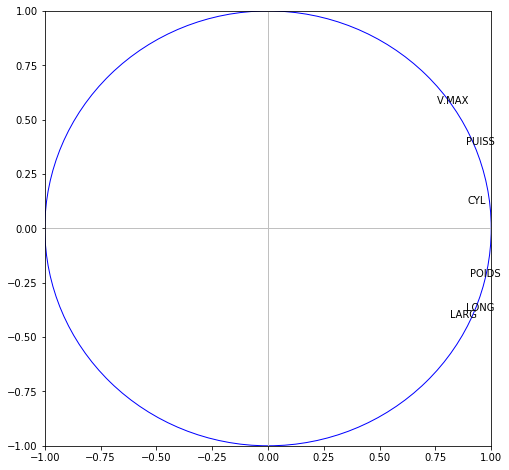

In [63]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1) #affichage des étiquettes (noms des variables) 

for j in range(6): 
    plt.annotate(data_standarized.columns[j],(corvar[j,0],corvar[j,1])) 

#ajouter les axes 
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)


#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle) #affichage plt.show()



<font color="blue">On perçoit clairement l’effet taille sur le premier axe : les voitures puissantes et rapides sont aussi les plus lourdes et imposantes, 
    la relation globale entre les variables est en réalité déterminée par la cylindrée (CYL).</font>
    
    Le poid es fortement correle et inversement correle a la puissance.

# 10.  Qualite de representation de variables

In [55]:
cos2var = corvar**2 
pdCos2Car = pd.DataFrame({'id':x_labels,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
pdCos2Car

,id,COS2_1,COS2_2
0,CYL,0.798277,0.013203
1,PUISS,0.786517,0.147986
2,LONG,0.785270,0.145183
3,LARG,0.661841,0.170351
4,POIDS,0.819364,0.050415
5,V.MAX,0.569588,0.328925


# 11. Contribution des variables aux axes (CTR)

In [56]:
#contributions 
p=6
ctrvar = cos2var 

for k in range(p): 
    ctrvar[:,k] = ctrvar[:,k]/eig_vals[k] #on n'affiche que pour les deux premiers axes

pdCtrVar = pd.DataFrame({'id':x_labels,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})
pdCtrVar

,id,CTR_1,CTR_2
0,CYL,0.180571,0.015423
1,PUISS,0.177911,0.172868
2,LONG,0.177628,0.169594
3,LARG,0.149709,0.198994
4,POIDS,0.185341,0.058892
5,V.MAX,0.128841,0.384230


# 12. Evaluez la qualite de representation de chaque individu suplementaire sur les deux premieres axes

In [57]:
dataSuplem = pd.read_excel("autos-Saporta.xls", 'suplem')
pd.set_option('display.max_rows', None)
dataSuplem

,Modele,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,Peugeot 604,2664,136,472,177,1410,180
1,Peugeot 304,1288,74,414,157,915,160


In [58]:
# Centrer et reduire

In [59]:
dataSuplem_X = dataSuplem.drop(['Modele'], axis = 1).astype(float)

data_suplem_std = scaler.transform(dataSuplem_X)
data_suplem_standarized = pd.DataFrame(data_suplem_std, columns = ['CYL','PUISS','LONG','LARG','POIDS','V.MAX'])
data_suplem_standarized

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,2.840806,2.595112,1.791990,2.001041,2.488122,1.841127
1,-0.945712,-0.535856,-0.907631,-1.871942,-1.230913,0.145972


In [60]:
# Obtention de projection dans l'espace factoriel

coordSupp = pca.transform(data_suplem_std)
print(coordSupp)

coordSuppDf = pd.DataFrame(coordSupp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
coordSuppDf['Modele'] = dataSuplem['Modele']
coordSuppDf

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


,PC1,PC2,PC3,PC4,PC5,PC6,Modele
0,5.563292,0.338609,-0.464289,0.402146,-0.389811,-0.081021,Peugeot 604
1,-2.212241,1.257779,-0.093044,-0.353702,0.648528,0.124730,Peugeot 304


<function matplotlib.pyplot.show(*args, **kw)>

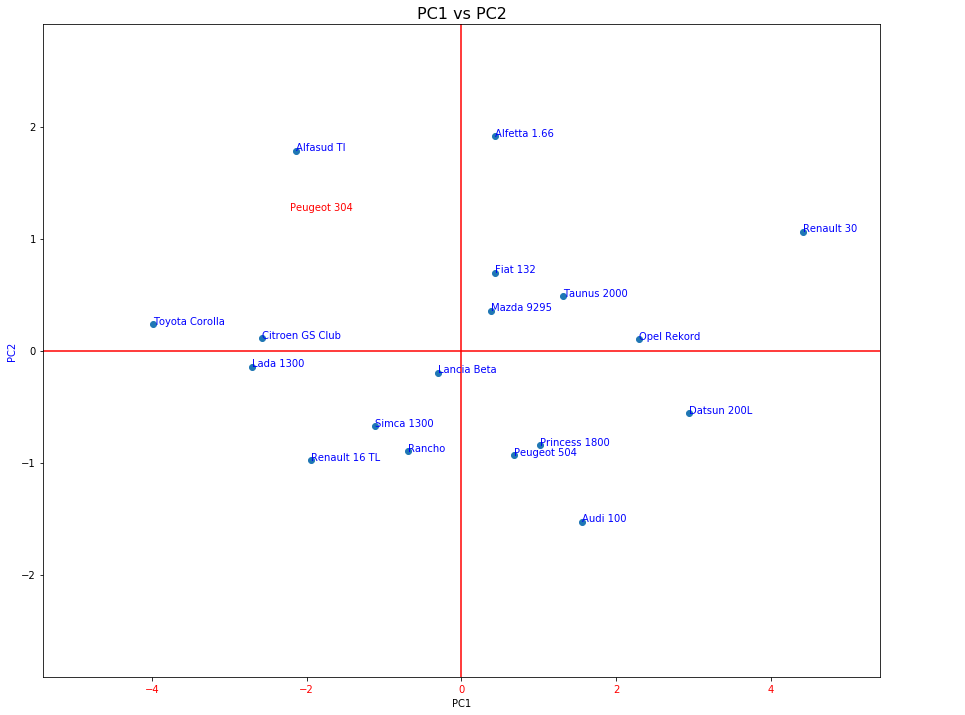

In [61]:
fig, axes = plt.subplots(figsize=(15,12))
#Axes
xmin = principalComponentsDf['PC1'].max()
ymin = principalComponentsDf['PC2'].max()

axes.set_xlim(-xmin-1, xmin+1)
axes.set_ylim(-ymin-1, ymin+1)

axes.axhline(0,color='red') # x = 0
axes.axvline(0,color='red') # y = 0

#Labels
plt.title('PC1 vs PC2', color = 'black', fontsize = 16)
plt.xlabel('PC1',color = 'black')
plt.ylabel('PC2', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'black')

#Data graphique
plt.scatter(principalComponentsDf['PC1'], principalComponentsDf['PC2'])
principalComponentsDf['Modele'] = dataOriginal['Modele']  #For labels points

#Including tags for any plot in order to identify in the new artifitiel dimension PC1, PC2
for i, row in principalComponentsDf.iterrows():
    plt.annotate(principalComponentsDf['Modele'].iloc[i], (principalComponentsDf['PC1'].iloc[i], principalComponentsDf['PC2'].iloc[i]), color='b')
plt.show

#Including tags donnes supplementaires
for i, row in coordSuppDf.iterrows():
    plt.annotate(coordSuppDf['Modele'].iloc[i], (coordSuppDf['PC1'].iloc[i], coordSuppDf['PC2'].iloc[i]), color='r')
plt.show




In [62]:
coordSuppDf

,PC1,PC2,PC3,PC4,PC5,PC6,Modele
0,5.563292,0.338609,-0.464289,0.402146,-0.389811,-0.081021,Peugeot 604
1,-2.212241,1.257779,-0.093044,-0.353702,0.648528,0.124730,Peugeot 304


La graphique represente les donnes sur les deux premiere axes principaux, 
pour le premiere axe Toyota et Datsun sont importantes et pour l'axe deux Alfetta et Audi.

Renautl 30 et Toyota on des comportements differents sur le premiere axe.